In [2]:
# Import necessary libraries
# Download "vader_lexicon" for sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abrah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Import necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Variable "analyzer" is assigned SentimentIntensityAnalyzer class
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Import necessary libraries
import pandas as pd

# Load your dataset
additional_c = pd.read_excel(r"C:\Users\abrah\OneDrive\Desktop\Semester 3\Decision Support Systems\Smart Tagging System Analysis\Data\CleanedPostSurvey4AdditionalComments.xlsx")


# Apply sentiment analysis
additional_c['Sentiment'] = additional_c['Answer 13'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiment
additional_c['Sentiment_Analysis'] = additional_c['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

print(additional_c.head())

                                           Answer 13  Sentiment  \
0  Confusing assignment, learned about integratio...    -0.2617   
1      Learned how librarians make item associations     0.0000   
2    Thought I was making new tags, but many existed     0.0000   
3     Initially confusing, easier after help session     0.5574   
4  Moving items removed previous associations; sh...     0.0000   

  Sentiment_Analysis  
0           Negative  
1            Neutral  
2            Neutral  
3           Positive  
4            Neutral  


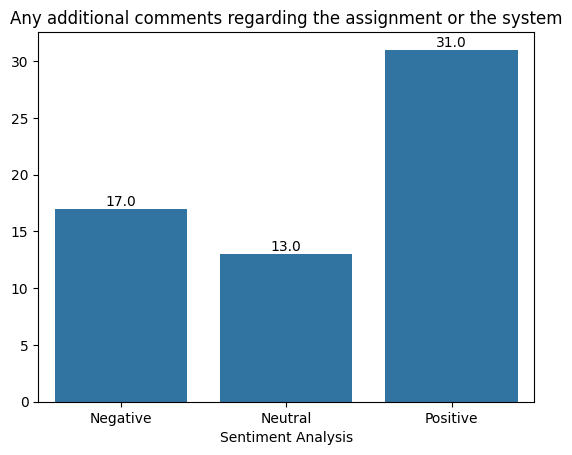

In [7]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the bar chart
ax = sns.countplot(x='Sentiment_Analysis', data=additional_c)
plt.title('Any additional comments regarding the assignment or the system')

# Add labels to the bars
# Loop through each bar in the chart
for bar in ax.patches:
    
    # Get the height of the bar (value/count)
    bar_height = bar.get_height()
    
    # Calculate the x and y positions for the label
    x_pos = bar.get_x() + bar.get_width() / 2    # Center the label horizontally
    y_pos = bar_height                           # Place the label right at the top of the bar
    
    # Add the label to the bar
    ax.text(x_pos, y_pos, str(bar_height), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Sentiment Analysis')
ax.set_ylabel('')

plt.show()